In [1803]:
# #libraries installation
# !pip install yfinance
# !pip install mpl_finance
# !pip install stockstats
# !pip install get-all-tickers
# !pip install Yahoo-ticker-downloader

In [1804]:
#sincronizing with Google Drive
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
# root_folder0="/content/drive/My Drive/Trading"
root_folder0="/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers.csv"
DB_path_1_years="Db/DataSet_all_tickers_1_years.csv"
DB_path_3_years="Db/DataSet_all_tickers_3_years.csv"
DB_path_5_years="Db/DataSet_all_tickers_5_years.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
/content/drive/My Drive/Maestría/Sapienza/Semester 3/Data_Mining/Data_Mining_Final_Project
Db		     LSTM_FABIAN.ipynb		no_Data
images		     LSTM_Filtered.ipynb	Papers
loading_data_tes.py  mean_causation_matrix.csv	ProjectFinalPresentaion.pptx
LSTM_attamp_1.ipynb  Models			technical_indicators2.ipynb
LSTM_Extended.ipynb  MVAR_analysis.ipynb	technical_indicators.ipynb


In [1805]:
#calling libraries
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [1806]:
#importing the most important tickers over the world
top_tickers=pdr.get_tops_iex().head(10000)


In [1807]:
top_tickers

,symbol,sector,securityType,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,marketPercent
0,ANDAR,n/a,right,0.00,0,0.00,0,1613572200003,0.000,0,0,0,0.00000
1,DFIN,diversifiedfinancials,commonstock,22.26,100,22.34,100,1613594295508,22.315,10,1613594206209,17726,0.03867
2,OCSL,diversifiedfinancials,commonstock,6.06,100,6.09,400,1613594286846,6.080,60,1613594151642,11870,0.02914
3,THR,capitalgoods,commonstock,0.00,0,0.00,0,1613594292270,17.170,5,1613594136156,4986,0.05982
4,ECC,n/a,closedendfund,11.53,300,0.00,0,1613593982867,11.570,100,1613593982858,1898,0.04430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,IXC,n/a,etp,23.73,200,23.81,300,1613594311480,23.730,2,1613594234059,8275,0.01247
9865,GROW,diversifiedfinancials,commonstock,0.00,0,0.00,0,1613594226400,7.670,200,1613593772750,4118,0.01107
9866,JMIA,retailing,adr,59.74,200,59.85,200,1613594312735,59.820,5,1613594292002,111181,0.02520
9867,APO,diversifiedfinancials,commonstock,0.00,0,51.92,200,1613594302777,51.915,1,1613594303304,18444,0.04038


In [1808]:
# # !pip install iexfinance
# from iexfinance.refdata import get_iex_symbols

# # tickers=pdr.get_iex_symbols()
# tickers=pdr.get_nasdaq_symbols()
# len(tickers)


In [1809]:
import numpy as np
#adding manually the first 100 most important tickers in the world
# tickers=["BTC-USD"]
# tickers=["TSLA"]
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [1810]:
len(tickers)

102

In [1811]:
#if we want to update the dataset
update_DB=False
#creating/verifying folders
!mkdir -p Db/

#
# import tickers stock prices
if update_DB:
  df0 = pdr.get_data_yahoo(tickers, start="2005-01-01", end="2021-12-31")
  df0.columns=df0.columns.swaplevel(0, 1)#interchanging the header, given by default
  df0.to_csv(DB_path_basic,sep='\t',index=True)



In [1812]:
# df0.head()

In [1813]:
#feature extraction
def Feature_Extraction(raw_df): 
    stock = StockDataFrame.retype(raw_df)
    #volume delta against previous day
    stock['volume_delta']

    # open delta against next 2 day
    # stock['open_2_d']

    # open price change (in percent) between today and the day before yesterday
    # 'r' stands for rate.
    stock['open_-2_r']

    # CR indicator, including 5, 10, 20 days moving average
    stock['cr']
    stock['cr-ma1']
    stock['cr-ma2']
    stock['cr-ma3']

    # # volume max of three days ago, yesterday and two days later
    # stock['volume_-3,2,-1_max']

    # # volume min between 3 days ago and tomorrow
    # stock['volume_-3~1_min']

    # KDJ, default to 9 days
    stock['kdjk']
    stock['kdjd']
    stock['kdjj']

    # # three days KDJK cross up 3 days KDJD
    # stock['kdj_3_xu_kdjd_3']

    # 2 days simple moving average on open price
    stock['open_2_sma']

    # MACD
    stock["macd"]
    # MACD signal line
    stock['macds']
    # MACD histogram
    stock['macdh']

    # bolling, including upper band and lower band
    stock['boll']
    stock['boll_ub']
    stock['boll_lb']

    # close price less than 10.0 in 5 days count
    stock['close_10.0_le_5_c']

    # CR MA2 cross up CR MA1 in 20 days count
    stock['cr-ma2_xu_cr-ma1_20_c']

    # count forward(future) where close price is larger than 10
    stock['close_10.0_ge_5_fc']

    # 6 days RSI
    stock['rsi_6']
    # 12 days RSI
    stock['rsi_12']

    # 10 days WR
    stock['wr_10']
    # 6 days WR
    stock['wr_6']

    # CCI, default to 14 days
    stock['cci']
    # 20 days CCI
    stock['cci_20']

    # TR (true range)
    stock['tr']
    # ATR (Average True Range)
    stock['atr']

    # DMA, difference of 10 and 50 moving average
    stock['dma']

    # DMI
    # +DI, default to 14 days
    stock['pdi']
    # -DI, default to 14 days
    stock['mdi']
    # DX, default to 14 days of +DI and -DI
    stock['dx']
    # ADX, 6 days SMA of DX, same as stock['dx_6_ema']
    stock['adx']
    # ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
    stock['adxr']

    # TRIX, default to 12 days
    stock['trix']
        # TRIX based on the close price for a window of 3
    stock['close_3_trix']
    # MATRIX is the simple moving average of TRIX
    stock['trix_9_sma']
    # TEMA, another implementation for triple ema
    stock['tema']
        # TEMA based on the close price for a window of 2
    stock['close_2_tema']

    # VR, default to 26 days
    stock['vr']
    # MAVR is the simple moving average of VR
    stock['vr_6_sma']

    stock["macd"] 
    stock["macds"]
    l_pd=pd.DataFrame(stock)
    
    l_pd.columns=l_pd.columns.set_names(['Atributes'])
    return l_pd

In [1814]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=[1,3,5]
process_DS=False
if process_DS:
  for temp_year in num_years:
    DB_path_years="Db/DataSet_all_tickers_"+str(temp_year)+"_years.csv"
    # DB_path_basic
    df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
    df1.index = pd.to_datetime(df1.index)
    value_to_check = pd.Timestamp(date.today().year-temp_year-1,1,1)
    df1=df1[df1.index>= value_to_check]
    #deleting rows with null values
    # df1=df1.dropna()
    #buffer to store and process the tickers data
    # df1.index.name

    buff_Tickers=[]
    Tickers_DF=pd.DataFrame()
    tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
    new_tickers_name=[]
    # print(tickers_names)
    for ticker_name in tickers_names:
      # print(df1[ticker_name])
      # bn=df1[ticker_name].columns
      # print(bn)
      temp_df=df1[ticker_name].dropna()
      if len(temp_df)>=(temp_year*316*0.9):
        temp_pd=Feature_Extraction(df1[ticker_name])
        buff_Tickers.append(temp_pd)
        new_tickers_name.append(ticker_name)
    #concat all tickers dataframes already processed
    # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
    pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
    # pdtin=pdtin.set_names(['Symbols'])
    Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
    #pay attention to this because can delete important rows
    Tickers_DF=Tickers_DF.dropna()
    #saving into
    print("saving into: "+DB_path_years)
    Tickers_DF.to_csv(DB_path_years,sep='\t',index=True)
# else:
Tickers_DFs=[]
for temp_year in num_years:
    # Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
    DB_path_years="Db/DataSet_all_tickers_"+str(temp_year)+"_years.csv"
    Tickers_DFs.append( pd.read_csv(DB_path_years, sep='\t',header=[0,1], index_col=0))
print("DataSet Loaded")
# df1.columns

DataSet Loaded


In [1815]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1816]:
# len(new_tickers_name)
#1 year
year_selected=0
SEQ_LEN = 10#stepsize

Tickers_DF=Tickers_DFs[year_selected]

In [1817]:
Tickers_DF.head(100)

Symbols          ATVI                        ...        ZM                        
Atributes   adj close      close       high  ...    change          vr    vr_6_sma
Date                                         ...                                  
2019-10-10  53.339195  53.689999  53.840000  ... -2.539114   43.213864   57.927545
2019-10-11  54.461815  54.820000  55.380001  ...  0.478801   55.217984   56.236309
2019-10-14  54.650570  55.009998  55.200001  ... -0.770842   63.749836   56.164344
2019-10-15  55.196980  55.560001  55.599998  ...  0.437850  120.651104   65.306905
2019-10-16  55.226784  55.590000  55.939999  ... -4.809448   89.174378   70.593715
...               ...        ...        ...  ...       ...         ...         ...
2020-02-27  57.948883  58.330002  60.290001  ...  6.240649  302.733968  267.141927
2020-02-28  57.750187  58.130001  58.180000  ... -7.529725  189.018542  257.295082
2020-03-02  60.194115  60.590000  60.650002  ...  7.723810  212.960516  256.240977
2020-03-03  58.366135  58.750000  61.820000  ...  3.854655  241.604997  255.558768
2020-03-04  62.141308  62.549999  62.590000  ... -0.570357  200.747374  235.726549

[100 rows x 8262 columns]

In [1818]:
#by company
# ticker_name="BTC-USD"
ticker_name="TSLA"
Tickers_DF[ticker_name].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-10,48.948002,48.948002,49.855999,48.316002,49.056000,31416500.0,-3055500.0,3.989486,49.040001,131.779492,129.882176,130.956565,111.469371,81.840057,73.122033,73.122033,67.325890,67.325890,84.714317,84.714317,48.660000,0.440445,0.415384,0.025061,48.015300,1.247187,48.015300,50.509673,45.520926,False,0.0,20.0,False,True,5.0,48.905998,0.042004,1.654919,62.334072,1.329267,...,18.159943,18.159943,47.560619,92.103062,47.958533,72.515527,1.539997,1.777156,48.046399,46.46724,1.579159,0.396000,0.396000,0.186001,0.0,0.396000,0.508143,0.508143,1.777156,28.593041,28.593041,0.0,0.364926,0.364926,20.534284,20.534284,16.403818,16.403818,14.114990,14.114990,15.897382,15.897382,0.129716,0.574606,0.177241,48.973741,48.991193,0.085886,106.076777,88.870263
2019-10-11,49.577999,49.577999,50.216000,49.362000,49.430000,42377000.0,10960500.0,2.415880,49.718666,133.238032,123.209803,129.066285,113.207595,88.097007,78.113691,78.113691,70.921824,70.921824,92.497425,92.497425,49.243000,0.535280,0.439363,0.095917,48.042200,1.275922,48.042200,50.594044,45.490355,False,0.0,20.0,False,True,5.0,48.948002,0.629997,2.096513,67.705611,1.486149,...,11.902993,13.863545,47.656571,119.224359,47.982733,114.449302,1.267998,1.740787,48.161599,46.52340,1.638199,0.360001,0.360001,1.045998,0.0,0.360001,0.488391,0.488391,1.740787,28.055729,28.055729,0.0,0.316269,0.316269,18.168180,18.168180,21.390551,21.390551,16.193722,16.193722,15.982051,15.982051,0.140173,0.729709,0.167505,49.548884,49.566203,1.287075,107.251647,91.784573
2019-10-14,51.391998,51.391998,51.709999,49.425999,49.580002,51025000.0,8648000.0,1.068171,50.842665,140.695385,118.782265,124.640642,115.813424,95.360362,83.862581,83.862581,75.235410,75.235410,101.116924,101.116924,49.505001,0.748188,0.501128,0.247060,48.183700,1.477588,48.183700,51.138876,45.228523,False,0.0,20.0,False,True,5.0,49.577999,1.813999,3.622331,78.365894,1.978938,...,4.639638,5.300013,48.012905,161.751554,48.086833,169.121343,2.284000,1.779588,48.483399,46.61388,1.869519,1.493999,1.493999,0.063999,0.0,1.493999,0.622472,0.622472,1.779588,34.978416,34.978416,0.0,0.274100,0.274100,15.402446,15.402446,38.855964,38.855964,22.668648,22.668648,17.892507,17.892507,0.168609,1.177592,0.161370,51.022646,51.344015,3.658879,124.002840,99.173170
2019-10-15,51.577999,51.577999,52.000000,50.824001,51.540001,32164000.0,-18861000.0,4.268664,51.467333,139.987629,121.385872,123.973121,118.900032,94.092934,87.272699,87.272699,79.247839,79.247839,103.322417,103.322417,50.560001,0.921307,0.585164,0.336143,48.314700,1.655304,48.314700,51.625307,45.004092,False,0.0,20.0,False,True,5.0,51.391998,0.186001,3.810073,79.210295,2.034061,...,5.907066,8.274530,48.469904,176.807537,48.224333,180.718886,1.175999,1.736475,48.747399,46.73216,2.015239,0.290001,0.290001,1.398003,0.0,0.290001,0.578142,0.578142,1.736475,33.294026,33.294026,0.0,0.237553,0.237553,13.680213,13.680213,41.754402,41.754402,28.121721,28.121721,20.815139,20.815139,0.206804,1.326469,0.159718,51.718927,51.639696,0.361926,125.860627,106.404838
2019-10-16,51.950001,51.950001,52.419998,51.383999,51.478001,33420500.0,1256500.0,3.828154,51.917999,144.165400,123.882939,126.516019,120.809140,93.094366,89.213255,89.213255,82.569644,82.569644,102.500475,102.500475,51.509001,1.076118,

In [1819]:
# Tickers_DF["TSLA"].head()

In [1820]:
#each attribute $in lower case, sorry xD
Tickers_DF[ticker_name,"close"]

Date
2019-10-10     48.948002
2019-10-11     49.577999
2019-10-14     51.391998
2019-10-15     51.577999
2019-10-16     51.950001
                 ...    
2021-02-09    849.460022
2021-02-10    804.820007
2021-02-11    811.659973
2021-02-12    816.119995
2021-02-16    796.219971
Name: (TSLA, close), Length: 340, dtype: float64

In [1821]:
# Tickers_DF.xs('TSLA',level='Atributes',axis=1)
# df.xs('Symbols',level='TSLA',axis=1)


In [1822]:
# # df_spy.head()
# df=df_aapl.tail(20)
# df_size=df.size
# columns=df_aapl.head(1).columns
# for num,(val,ticker) in enumerate(columns):
#   print(val)
#   print(ticker)

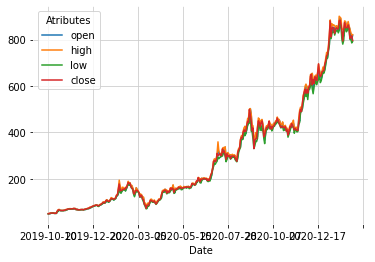

In [1823]:
# df1.xs('TSLA',level='Symbols',axis=1)[["Open", "High", "Low", "Close"]].plot()

Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()

> # LSTM

In [1824]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

In [1825]:
df=Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])]
df.head()

Atributes,open,high,low,close
Date,,,,
2019-10-10,49.056000,49.855999,48.316002,48.948002
2019-10-11,49.430000,50.216000,49.362000,49.577999
2019-10-14,49.580002,51.709999,49.425999,51.391998
2019-10-15,51.540001,52.000000,50.824001,51.577999
2019-10-16,51.478001,52.419998,51.383999,51.950001


# Normalization

In [1826]:
#creting object to scale the values
scaler = MinMaxScaler()
scaler_close = MinMaxScaler()
size_df=df.shape




In [1827]:
#extracting the labels and features
close_price = df.close.values.reshape(-1, 1)
price = df.values.reshape(-1, size_df[1])
#escaling data
scaled = scaler.fit_transform(price)
scaled_close=scaler_close.fit_transform(close_price)

In [1828]:
#checking stage
size_df=price.shape
# df.shape
size_df

(340, 4)

In [1829]:
#chcking if is there none values
np.isnan(scaled).any()

False

In [1830]:
#removing none values
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled = scaled[~np.isnan(scaled)]

In [1831]:
#reshaping
scaled_close = scaled_close.reshape(-1, 1)
scaled = scaled.reshape(-1, size_df[1])

In [1832]:
print(scaled[0:10])

[[0.         0.         0.         0.        ]
 [0.00044401 0.00042326 0.00127052 0.00075526]
 [0.00062209 0.00217978 0.00134826 0.00292995]
 [0.00294899 0.00252074 0.00304634 0.00315294]
 [0.00287538 0.00301454 0.00372654 0.00359891]
 [0.00408869 0.00364473 0.00451606 0.00413119]
 [0.0036613  0.00317914 0.00328441 0.00292756]
 [0.00309857 0.00240317 0.00208919 0.00210036]
 [0.00214644 0.00212805 0.00225195 0.00259908]
 [0.00218918 0.00161309 0.00237342 0.00238329]]


In [1833]:
np.isnan(scaled).any()

False

# Preprocessing

In [1834]:
#function to build the windows to be send in the training and  calidation
def to_sequences(data, seq_len):
    d = []
    #extracting the windown depending on the 
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, -1]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, -1]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = preprocess(scaled, SEQ_LEN, train_split = 0.8)
# X_train_close, y_train_close, X_test_close, y_test_close = preprocess(scaled_close, SEQ_LEN, train_split = 0.9)#this is the worst way to do this but is only to check if it is working

In [1835]:
X_train.shape

(264, 9, 4)

In [1836]:
y_train.shape

(264,)

In [1837]:
X_test.shape

(66, 9, 4)

In [1838]:
X_test

array([[[0.44484546, 0.44753004, 0.45158659, 0.45044127],
        [0.43620271, 0.433539  , 0.43446005, 0.42807097],
        [0.42846219, 0.4329041 , 0.43501878, 0.43383737],
        ...,
        [0.45298958, 0.45329105, 0.44794265, 0.44600559],
        [0.45023528, 0.45869936, 0.45632371, 0.46651767],
        [0.4594954 , 0.45466666, 0.45666381, 0.45675916]],

       [[0.43620271, 0.433539  , 0.43446005, 0.42807097],
        [0.42846219, 0.4329041 , 0.43501878, 0.43383737],
        [0.42482939, 0.42059433, 0.40179816, 0.40651591],
        ...,
        [0.45023528, 0.45869936, 0.45632371, 0.46651767],
        [0.4594954 , 0.45466666, 0.45666381, 0.45675916],
        [0.46353185, 0.47339584, 0.45267977, 0.44634127]],

       [[0.42846219, 0.4329041 , 0.43501878, 0.43383737],
        [0.42482939, 0.42059433, 0.40179816, 0.40651591],
        [0.40951463, 0.41987716, 0.41781936, 0.42146541],
        ...,
        [0.4594954 , 0.45466666, 0.45666381, 0.45675916],
        [0.46353185, 0.473395

In [1839]:
X_test[:, :,[3]]#.reshape(-1,1,1)

array([[[0.45044127],
        [0.42807097],
        [0.43383737],
        [0.40651591],
        [0.42146541],
        [0.44950618],
        [0.44600559],
        [0.46651767],
        [0.45675916]],

       [[0.42807097],
        [0.43383737],
        [0.40651591],
        [0.42146541],
        [0.44950618],
        [0.44600559],
        [0.46651767],
        [0.45675916],
        [0.44634127]],

       [[0.43383737],
        [0.40651591],
        [0.42146541],
        [0.44950618],
        [0.44600559],
        [0.46651767],
        [0.45675916],
        [0.44634127],
        [0.43327392]],

       [[0.40651591],
        [0.42146541],
        [0.44950618],
        [0.44600559],
        [0.46651767],
        [0.45675916],
        [0.44634127],
        [0.43327392],
        [0.44139007]],

       [[0.42146541],
        [0.44950618],
        [0.44600559],
        [0.46651767],
        [0.45675916],
        [0.44634127],
        [0.43327392],
        [0.44139007],
        [0.43495232]],



In [1840]:
y_train.shape

(264,)

# Model

In [1841]:
#defining dropout to avoid overfitting
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1
#Buidling the network model
model = keras.Sequential()

model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(CuDNNLSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

#defining a bidirectional LSTM in order to extract more information
model.add(Bidirectional(CuDNNLSTM(WINDOW_SIZE, return_sequences=False)))
#definin the output 
model.add(Dense(units=1))

model.add(Activation('linear'))

# Training

In [1842]:
model.compile(
    #ean squared error (commonly used in stockmarket predictions)
    loss='mean_squared_error', 
    #adam optimizer because is faster
    optimizer='adam'
)

In [1843]:
#predicting in the test dataset
y_hat = model.predict(X_test)

In [1844]:
BATCH_SIZE = 64

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    #not random 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 0.0161 - val_loss: 0.0988
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0059 - val_loss: 0.0324
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0102 - val_loss: 0.0084
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0149 - val_loss: 0.0035
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0127 - val_loss: 0.0041
Epoch 6/50
4/4 [==============================] - 0s 19ms/step - loss: 0.0073 - val_loss: 0.0063
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0033 - val_loss: 0.0068
Epoch 8/50
4/4 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 0.0041
Epoch 9/50
4/4 [==============================] - 0s 22ms/step - loss: 9.6269e-04 - val_loss: 8.0659e-04
Epoch 10/50
4/4 [==============================] - 0s 19ms/step - loss: 6.4155e-04 - val_loss: 0.0010
Epoch 11/50
4/4 [==

In [1845]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0268


0.026824673637747765

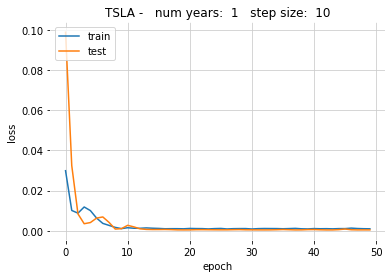

In [1846]:
#ploting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(ticker_name+' -   num years:  '+str(num_years[year_selected])+"   step size:  "+str(SEQ_LEN))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()

# Prediction

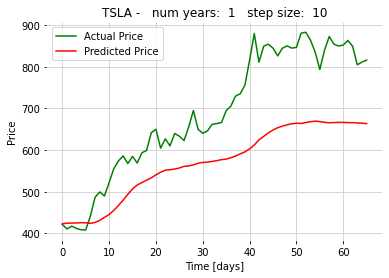

In [1847]:

#predicting model
y_hat = model.predict(X_test)
#coming back to the non scaled values
y_test_inverse = scaler_close.inverse_transform(y_test.reshape(-1,1))
y_hat_inverse = scaler_close.inverse_transform(y_hat)
 
#plotting
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title(ticker_name+' -   num years:  '+str(num_years[year_selected])+"   step size:  "+str(SEQ_LEN))
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show();

In [1848]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [1849]:
fig = make_subplots(rows=1, cols=2, start_cell="bottom-left",subplot_titles="1 year",print_grid=True,)

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



In [1850]:
y_data=list(y_test_inverse)
x_data=range(len(y_data))
print(len(x_data))
print(len(y_data))
dff=pd.DataFrame()
dff["y"]=y_data
dff["x"]=x_data

66
66


In [1851]:
# fig=px.line(dff, x='x', y="y")
# # fig.add_trace(px.line(dff, x='x', y="y"),row=1,col=1)
# fig.show()